In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from astropy import constants as const
from astropy import units as u
import math
from astropy.constants import c, L_sun, sigma_sb, M_jup, M_earth

In [20]:
df_koshimoto_large = pd.read_csv('/home/anibal/genulens/tmp_new.dat', delim_whitespace=True, comment='#', header=None)
header = ["wtj", "M_L", "D_L", "D_S", "tE", "thetaE", "piE", "piEN", "piEE", "mu_rel", "muSl", "muSb", "i_L", "iS",
          "iL", "fREM"]
df_koshimoto_large.columns = header
# data["D_S"]=df_koshimoto_large["D_S"]
# data["D_L"]=df_koshimoto_large["D_L"]
# data["mu_rel"]=df_koshimoto_large["mu_rel"]



In [21]:

# plt.hist(data["mu_rel"], bins=np.arange(0,100,10))
# plt.yscale('log')
# plt.xlabel(r'$\mu_{rel}$')

In [22]:
try:
    data = pd.read_csv('/home/anibal/Downloads/things/df_trilegal_radios.csv')
except:
    Radii_star = []
    for i in tqdm(range(len(data))):
        logL = data['logL'][i]  # log10 of the luminosity in Lsun from TRILEGAL
        logTe = data['logTe'][i]  # log10 of effective temperature in K from TRILEGAL
        L_star = 10**(logL)
        Teff = (10**(logTe))*u.K
        top = L_star*L_sun
        sigma = sigma_sb
        bot = 4*np.pi*sigma*Teff**4
        Rstar = np.sqrt(top/bot)
        Radii_star.append(Rstar.to('R_sun').value)

    data['radius']=Radii_star
    df_koshimoto_large = pd.read_csv('/home/anibal/genulens/tmp_new.dat', delim_whitespace=True, comment='#', header=None)
    header = ["wtj", "M_L", "D_L", "D_S", "tE", "thetaE", "piE", "piEN", "piEE", "mu_rel", "muSl", "muSb", "i_L", "iS",
              "iL", "fREM"]
    df_koshimoto_large.columns = header
    data["D_S"]=df_koshimoto_large["D_S"]
    data["D_L"]=df_koshimoto_large["D_L"]
    data["mu_rel"]=df_koshimoto_large["mu_rel"]

    data = data[['u','g','r','i','z','Y','W149','radius','D_S','D_L','mu_rel']]
    data = data[data['D_S']<8000]
    data.to_csv('/home/anibal/Downloads/df_trilegal_radios.csv', index=False)
    
print('The len() of the database is: ',len(data))
data.head()

The len() of the database is:  6752296


,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,1.752341
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,3.368060
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,6.920123
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,9.626590
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,6.344430


In [23]:
# print(len(data))# data.columns = ['u', 'g', 'r', 'i', 'z', 'Y', 'W149', 'radius', 'D_S', 'D_L', 'mu_rel']#, 't0', 'tE', 'u0', 'rho', 'piEE', 'piEN']

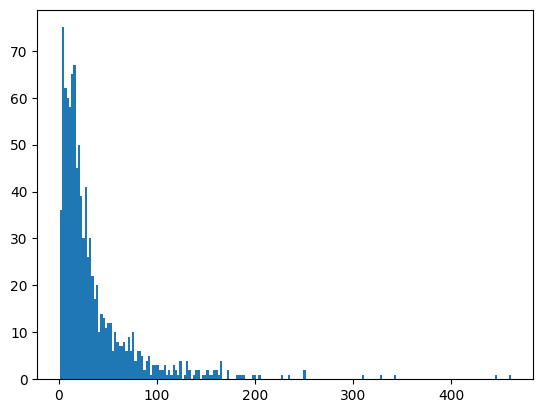

In [24]:
plt.hist(np.random.lognormal(3.1,1,1000),bins=200)
plt.show()


In [25]:
# print((1*u.rad).to('mas'))
# aconv = (180 * 60 * 60 * 1000) / math.pi
# print(aconv)

In [249]:
# 5e-3

In [248]:
# 1000*u.M_jup.to('M_sun')

In [245]:
print(round((1*u.M_jup/u.M_sun).decompose().value,3))
print(1e-3)

0.001
0.001


In [232]:
ang_radii_E = []
radii_source = []
tstart_Roman = 2461508.763828608
mlist=[]
dict_micro = {'m_planet':[],'m_star':[],'t0': [],'te': [],'u0': [],'rho': [],'piEE': [],'piEN': [],'s':[],'q':[],'alpha':[]}
for i in tqdm(range(int(4e+4))):#len(data))):
    # ml = (50*u.M_sun).value
    m_planet = np.random.uniform(0.0031463518655061432 , 13)* u.M_jup
    m_star = np.random.uniform(1 , 120 )* u.M_sun
    q = (m_planet/m_star).decompose()
    ml = (m_star+m_planet).decompose().to('M_sun')
    # print(ml)
    # ml = np.random.uniform((1 * u.M_sun).value, (120 * u.M_sun).value)
    # ml = ml*u.M_sun
    # print(ml)
    DS = (data.iloc[i]['D_S'] * u.pc).to('kpc')
    DL = (data.iloc[i]['D_L'] * u.pc).to('kpc')
    c = const.c
    G = const.G
    yr2day = 365.25
    pi_rel = ((1 / DL) - (1 / DS))
    # print(pi_rel)
    k = 4 * G / (c ** 2)
    aconv = (180 * 60 * 60 * 1000) / math.pi
    theta_E = np.sqrt(k * pi_rel * ml).decompose() * aconv #multiplico por aconv para pasar de rad a mas
    mu_rel = data.iloc[i]['mu_rel']
    tE = float((theta_E/mu_rel)*yr2day)
    piE = float(pi_rel.value/theta_E)
    ang_radii_E.append(theta_E)
    Rstar = data['radius'][i]*u.R_sun
    theta_s = np.arctan(Rstar/DS).decompose().to('mas').value
    radii_source.append(theta_s)
    #------------------------------------------------------------------------------------------------
    # t0 = np.random.uniform(tstart_Roman,
                           # tstart_Roman + 5 * 365)  # from 100 day before Roman is launched to one year later
    u0 = np.random.uniform(0, 3)
    rho = float((theta_s/theta_E).value)
    phi = np.random.uniform(0, np.pi)
    piEE = piE * np.cos(phi)
    piEN = piE * np.sin(phi)
    d = np.random.uniform(0.1,28)
    s = float(((np.arctan(d*u.au/DL).to('mas'))/(theta_E)).value)
    # print(s)
    # print(theta_E)
    # s = np.random.uniform(0,np.arctan(d/dl)/theta_E)
    t0 = np.random.uniform(tstart_Roman,
                       tstart_Roman + 5 * 365)
    dict_micro['u0'].append(u0)
    dict_micro['te'].append(tE)
    dict_micro['rho'].append(rho)
    dict_micro['piEE'].append(piEE)
    dict_micro['piEN'].append(piEN)
    dict_micro['t0'].append(t0)
    dict_micro['q'].append(q.value)
    dict_micro['s'].append(s)
    dict_micro['alpha'].append(np.random.uniform(0,np.pi))
    dict_micro['m_planet'].append(m_planet)
    dict_micro['m_star'].append(m_star)
    
    mass_kg = (pi_rel/(k*(pi_rel/theta_E)**2)).decompose()
    # print(mass_kg.to('M_sun'))
    # print((theta_E/aconv)**2)
    # print((((theta_E/aconv)**2)/(k*pi_rel)).decompose().to('M_sun'))
    mlist.append((((theta_E/aconv)**2)/(k*pi_rel)).decompose().to('M_sun'))
    # print(theta_E)
    # print(theta_s/rho)
    # mass.append(mass_kg.to('M_sun'))
    # print(mass_kg.to('M_sun'))
    # print((theta_E/(k*(pi_rel/theta_E))).decompose().to('M_sun'))
# plt.hist(mlist)

  0%|          | 0/40000 [00:00<?, ?it/s]

data

In [268]:
# 1*u.M_earth
# 1*u.M_earth.to('M_jup')
mp = data['m_planet'].iloc[0]#.to('M_sun')
ms = data['m_star'].iloc[0]
q = data['q'].iloc[0]

mt = ms+mp
mplanet = mt*q/(q+1)
print(mplanet.to('M_jup'))
print(mp)

0.549385995482032 jupiterMass
0.549385995482032 jupiterMass


In [189]:

# print(q.decompose())

In [192]:
# qmin = 1.03e-4
# qmax = 1.24e-2
# M=np.linspace(1,120,100)
# mass_min = qmin*(M * u.M_sun).to('M_jup')
# # plt.plot()
# # print(mass_min)
# plt.plot(M,mass_min, marker='o')
# # print(mass_min)

4.483794324186888
4764.008091653941


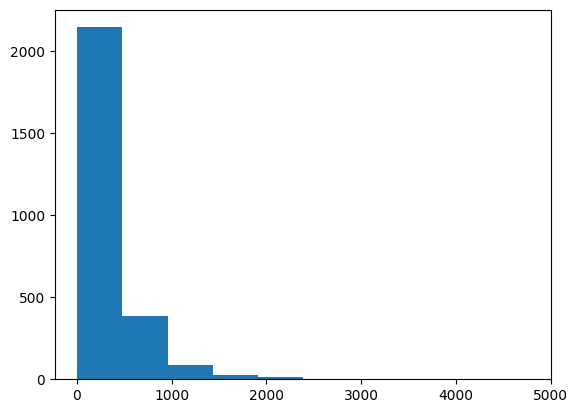

In [229]:
plt.hist(dict_micro['te'])
# plt.yscale('log')
print(min(dict_micro['te']))
print(max(dict_micro['te']))

In [30]:
data = data.head(int(4e+4))

data

,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,1.752341
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,3.368060
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,6.920123
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,9.626590
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,6.344430
...,...,...,...,...,...,...,...,...,...,...,...
39995,30.270,27.138,25.766,24.461,23.824,23.547,23.4588,0.408934,7484,4244,9.429390
39996,22.984,21.458,20.906,20.743,20.693,20.662,20.9088,0.825379,7683,746,12.546910
39997,32.049,28.683,27.260,25.661,24.889,24.548,24.4158,0.305600,7746,7341,6.555335
39998,30.951,27.823,26.453,25.156,24.524,24.248,24.1608,0.394142,7795,7657,6.938560


In [233]:
for key in dict_micro:
    data[key] = dict_micro[key]
data.head()

,u,g,r,i,z,Y,W149,radius,D_S,D_L,...,m_star,t0,te,u0,rho,piEE,piEN,s,q,alpha
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,...,58.22659005244498 solMass,2.461741e+06,1871.072664,2.543373,0.000014,-0.004002,0.018503,0.574750,0.000009,0.080567
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,...,68.38907962229482 solMass,2.462677e+06,820.673217,0.511873,0.000029,0.011864,0.006619,0.936354,0.000149,0.992486
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,...,44.89053529582336 solMass,2.462459e+06,300.548996,0.997628,0.000040,0.005881,0.014419,0.638608,0.000208,0.663002
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,...,20.17235252039844 solMass,2.462701e+06,216.120138,0.692485,0.000167,-0.032955,0.010737,1.764281,0.000364,0.962008
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,...,1.208548896185417 solMass,2.462503e+06,18.469821,1.173061,0.000457,-0.008160,0.031499,10.707425,0.001776,1.132549


In [18]:
# print(len(data[data['rho']>0.1*data['u0']]))
# print(len(data))

In [ ]:
# plt.hist(data['te'])
# plt.yscale('log')
# plt.show()
# plt.plot(data['u0'], data['rho'], marker='o', linestyle='')
# plt.yscale('log')

In [273]:
file_name = '/home/anibal/Downloads/things/df_trilegal_PB_params.csv'
# data.to_csv(file_name, index=False)

In [277]:
i=0
file_name = f'/home/anibal/results_roman_rubin/FFP_fs_split_{i + 1}.csv'
# data.to_csv(file_name, index=False)

data = pd.read_csv(file_name)
data.head()
print(len(data))

5000


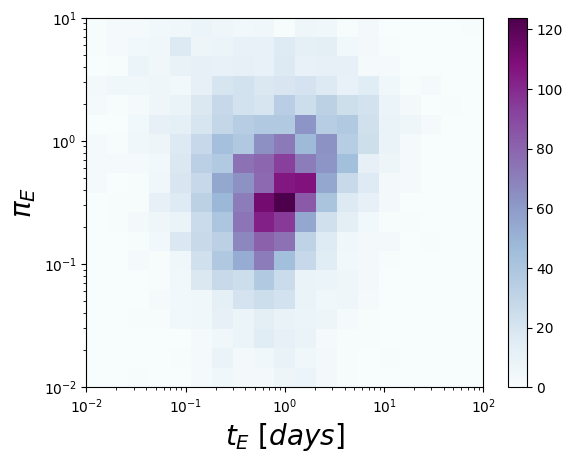

In [284]:
plt.hist2d(data['te'],np.sqrt(data['piEE']**2+data['piEE']**2),bins=(np.logspace(-2,2
                                                                                 ,20),np.logspace(-2,1,20)),cmap=plt.cm.BuPu)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$t_E \ [days]$', fontsize=20)
plt.ylabel(r'$\pi_E  $', fontsize=20)
plt.colorbar()
plt.show()

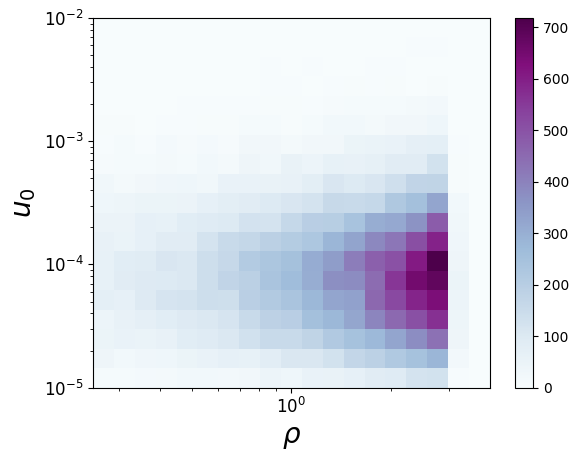

In [24]:
plt.hist2d(data['u0'], data['rho'],
           bins=(np.logspace(-0.6,0.6,20),np.logspace(-5,-2,20)),cmap=plt.cm.BuPu)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$u_0$', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
# plt.hist(data['alpha'])
# # plt.yscale('log')
# plt.xlabel('s', fontsize=20)

In [235]:
import pandas as pd
# Calculate the number of rows in each split
rows_per_split = 5000
num_splits = len(data) // rows_per_split
# Split the DataFrame into 8 pieces with approximately 5000 rows each
df_splits = [data.iloc[i * rows_per_split:(i + 1) * rows_per_split] for i in range(num_splits)]
# Save each split DataFrame to a CSV file

j = 0
for i, df_split in enumerate(df_splits):
    csv_filename = f'/home/anibal/results_roman_rubin/PB_planet_split_{i + 1}.csv'
    df_split.to_csv(csv_filename, index=False)
    print(f"Split {i + 1} saved to {csv_filename}")
    j = j+1
    if j>8:
        break


Split 1 saved to /home/anibal/results_roman_rubin/PB_planet_split_1.csv
Split 2 saved to /home/anibal/results_roman_rubin/PB_planet_split_2.csv
Split 3 saved to /home/anibal/results_roman_rubin/PB_planet_split_3.csv
Split 4 saved to /home/anibal/results_roman_rubin/PB_planet_split_4.csv
Split 5 saved to /home/anibal/results_roman_rubin/PB_planet_split_5.csv
Split 6 saved to /home/anibal/results_roman_rubin/PB_planet_split_6.csv
Split 7 saved to /home/anibal/results_roman_rubin/PB_planet_split_7.csv
Split 8 saved to /home/anibal/results_roman_rubin/PB_planet_split_8.csv


,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel,t0,te,u0,rho,piEE,piEN,s,q,alpha
0,29.601,26.474,25.107,23.698,23.008,22.705,22.6108,0.456723,7659,7585,3.256063,2.462801e+06,93.811431,2.033267,0.000332,0.001486,0.000333,0.604626,0.265870,3.108559
1,32.166,28.715,27.287,25.486,24.612,24.219,24.0668,0.279031,7712,4363,3.795269,2.462971e+06,663.406368,1.313730,0.000024,-0.007374,0.012414,0.273392,0.277424,2.460325
2,30.278,27.203,25.849,24.504,23.844,23.556,23.4698,0.434663,7857,6306,9.093387,2.461781e+06,172.702449,2.498220,0.000060,0.005952,0.004193,0.533999,0.099116,1.728898
3,30.377,27.346,26.007,24.720,24.087,23.811,23.7328,0.374243,7672,7318,6.616242,2.462450e+06,136.612546,2.696524,0.000092,0.002525,0.000344,1.270386,0.440784,1.258011
4,30.666,27.514,26.141,24.701,23.997,23.688,23.5898,0.427714,6667,6534,7.007349,2.462930e+06,60.486056,0.802751,0.000257,0.002534,0.000709,2.892857,0.187787,3.047995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,31.337,28.155,26.774,25.298,24.577,24.260,24.1558,0.384727,6873,2958,4.881865,2.462119e+06,428.205053,0.093096,0.000045,-0.021885,0.025556,1.157177,0.138672,0.948839
4996,29.996,27.112,25.825,24.770,24.249,24.021,23.9658,0.236675,7834,6738,9.453507,2.462750e+06,122.330240,0.337320,0.000044,-0.002470,0.006075,0.379112,0.794784,2.003939
4997,28.678,26.135,24.949,24.119,23.708,23.510,23.4908,0.363206,7685,7437,6.296039,2.461578e+06,70.138267,1.221696,0.000182,-0.003362,0.001257,2.997325,0.360187,2.993907
4998,30.134,27.326,26.065,25.123,24.658,24.451,24.4058,0.264334,7073,6913,3.860890,2.462905e+06,129.522818,0.506608,0.000127,0.000318,0.002369,0.183013,0.917157,1.115706


5000


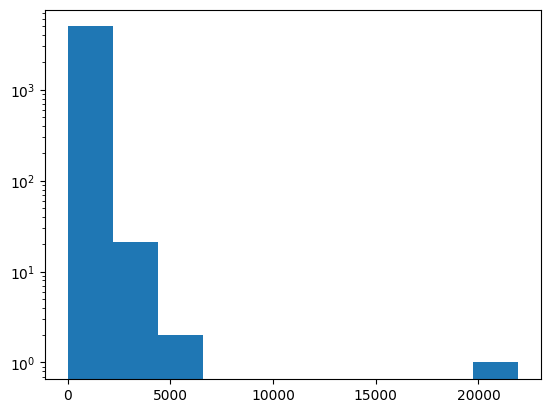

In [26]:
split_data = pd.read_csv('/home/anibal/results_roman_rubin/PB_split_4.csv', sep=',', decimal='.')
display(split_data)
plt.hist(split_data['te'])
plt.yscale('log')
print(len(split_data))